# Fake Bill Detection
Author: Morariu Tudor

## Citirea si Corectarea datelor

### Citirea Dataset-ului

In [178]:
import pandas as pd

data = pd.read_csv("fake_bills.csv", delimiter=';');

data.dropna(inplace=True);
# Eliminam Liniile care au NaN deoarece nu am momentan un placeholder si sunt 37 de linii.

display(data);

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


*   **Obs 1**: Dataset-ul contine $1500$ de linii a $7$ coloane.
*   **Obs 2**: Dataset-ul trebuie normalizat.

### Normalizarea Datelor

#### Trasformarea coloanei "is_genuine" in bool

In [179]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder();

data["is_genuine"] = enc.fit_transform(data["is_genuine"]);

#### Normalizarea coloanelor

In [180]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler();

data = pd.DataFrame(scaler.fit_transform(data));

### Train-Test Split

In [181]:
from sklearn.model_selection import train_test_split

features = data.drop(columns=[0]);
labels = data[0];

train_f, test_f, train_l, test_l = train_test_split(features, labels, test_size=0.5);


### Plotare $2D$ folosind PCA

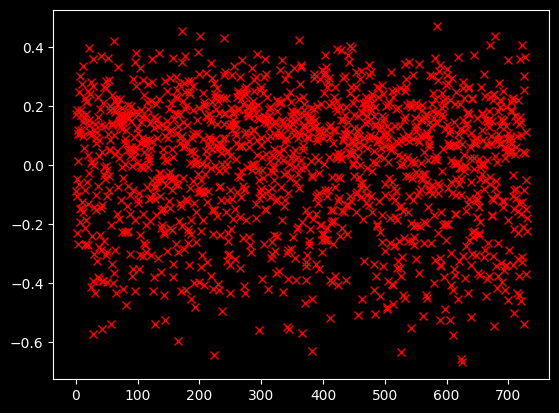

In [182]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.style.use('dark_background')

pca = PCA(n_components=2);

points = pca.fit_transform(train_f);

plt.plot(points, 'rx', );

*   **Obs**: Se observa doua clustere relativ bine definite.

## Alegera si Antrenarea modelului

*   Pentru model putem folosi un MLPClassifier deoarece este simplu si rapid de implementat.
*   Datele trebuie cluterizate in $2$ clustere, bancnote false sau adevarate.

In [183]:
from sklearn.neural_network import MLPClassifier
import numpy as np

model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10000, alpha=1e-4, solver='adam', verbose=0, tol=1e-8, random_state=1, learning_rate_init=.01, activation='relu');

N_TRAIN_SAMPLES = train_f.shape[0]
N_EPOCHS = 1000
N_BATCH = 10
N_CLASSES = np.unique(train_l)

scores_train = []
scores_test = []

train_f = train_f.values
train_l = train_l.values
test_f = test_f.values
test_l = test_l.values

epoch = 0
while epoch < N_EPOCHS:
    

    random_perm = np.random.permutation(train_f.shape[0])
    mini_batch_index = 0
    while True:
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        model.partial_fit(train_f[indices], train_l[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    scores_train.append(model.score(train_f, train_l))
    scores_test.append(model.score(test_f, test_l))

    print('Epoca:', epoch, " Scor Train:", model.score(train_f, train_l), "Scor Test:", model.score(test_f, test_l))

    epoch += 1


Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Epoch:  58
Epoch:  59
Epoch:  60
Epoch:  61
Epoch:  62
Epoch:  63
Epoch:  64
Epoch:  65
Epoch:  66
Epoch:  67
Epoch:  68
Epoch:  69
Epoch:  70
Epoch:  71
Epoch:  72
Epoch:  73
Epoch:  74
Epoch:  75
Epoch:  76
Epoch:  77
Epoch:  78
Epoch:  79
Epoch:  80
Epoch:  81
Epoch:  82
Epoch:  83
Epoch:  84
Epoch:  85
Epoch:  86
Epoch:  87
Epoch:  88
Epoch:  89
Epoch:  90
Epoch:  9

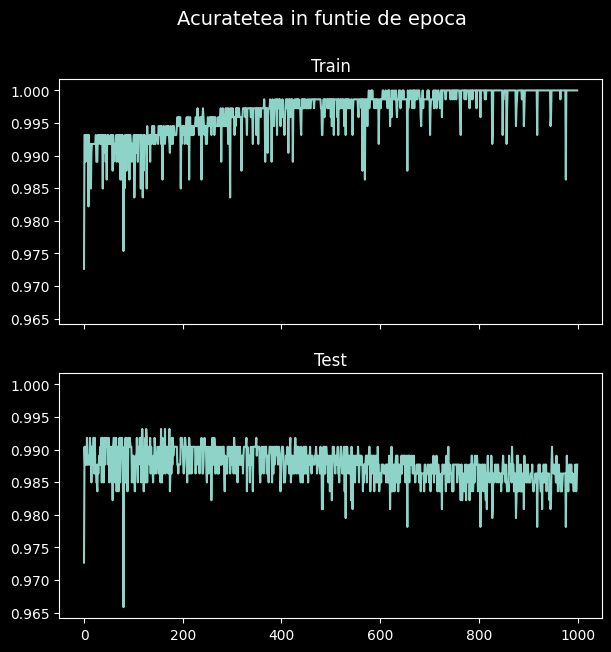

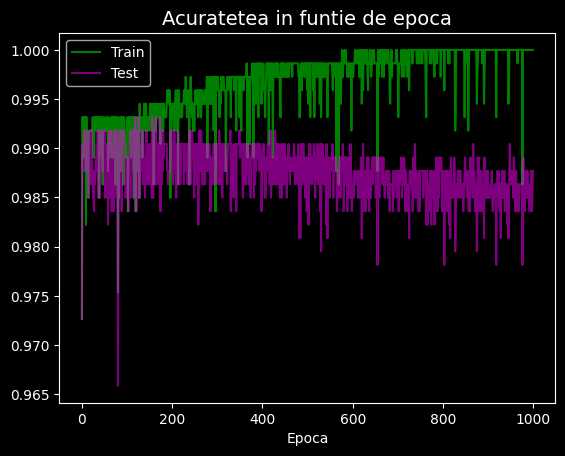

In [184]:
fig, ax = plt.subplots(2, sharex=True, sharey=True)

fig.set_figwidth(7);
fig.set_figheight(7);

ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Acuratetea in funtie de epoca", fontsize=14)

plt.show()

plt.plot(scores_train, color='green', alpha=1, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.5, label='Test')
plt.title("Acuratetea in funtie de epoca", fontsize=14)
plt.xlabel('Epoca')
plt.legend(loc='upper left')
plt.show()